In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [ ]:
# some notes 
#bar chart between airtemp and serftemp скорее нет
# line chart trend по времени
# histogram для чего 
# scatter для взаимоотношений
#scatter plot
#Температура воздуха vs. Температура дороги.
#Влажность vs. Точка росы.
#Температура воздуха vs. Коэффициент трения.
#Пример: Если коэффициент трения уменьшается при понижении температуры и увеличении осадков, это может быть критической информацией.



In [5]:
data = pd.read_csv('Tie_9_Jyväskylä _ Copy_for_data_vs.csv')

In [9]:
data.head()

,ts,airTemp,roadTemp,friction3,humidity,dewpoint,precipitation,hour
0,2021-04-16 03:44:00,-1.1,0.1,NaN,77.0,-4.6,0,3
1,2021-04-16 03:54:00,-1.2,0.1,NaN,78.0,-4.6,0,3
2,2021-04-16 04:04:00,-1.2,0.0,NaN,78.0,-4.6,0,4
3,2021-04-16 04:14:00,-1.3,-0.3,NaN,78.0,-4.7,0,4
4,2021-04-16 04:24:00,-1.4,-0.4,NaN,78.0,-4.7,0,4


In [7]:
data['ts'] = pd.to_datetime(data['ts'])

In [8]:
data['hour'] = data['ts'].dt.hour

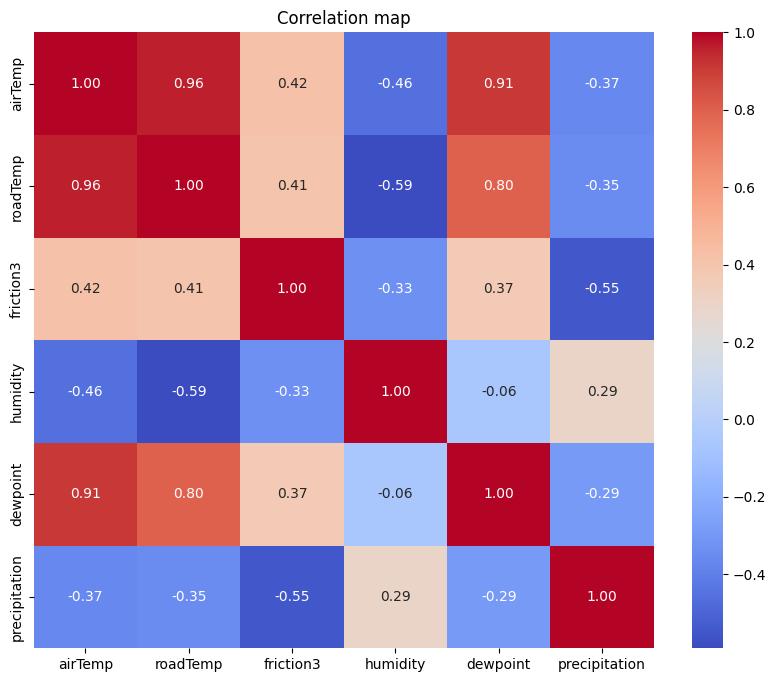

In [10]:
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(
    correlation_matrix,  
    annot=True,          
    fmt=".2f",           
    cmap="coolwarm",      
    cbar=True             
)

plt.title("Correlation map")
plt.show()


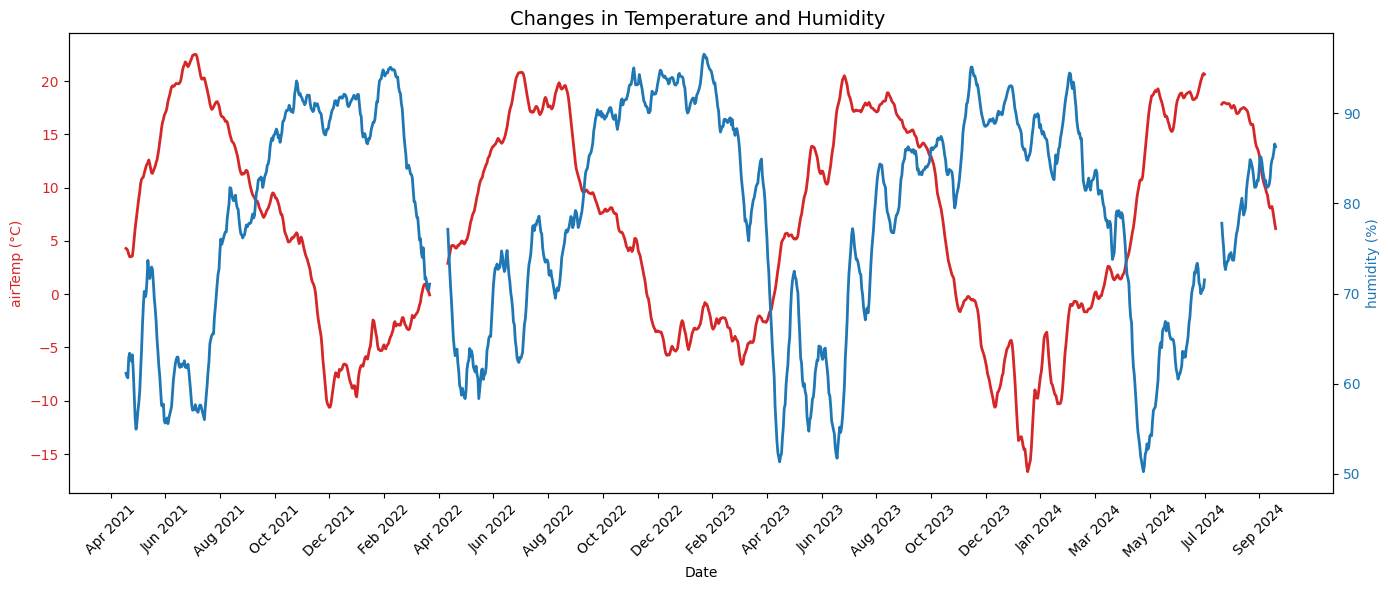

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates


data['ts'] = pd.to_datetime(data['ts'])


data_resampled = data.resample('D', on='ts').mean() 


data_resampled['airTemp_smooth'] = data_resampled['airTemp'].rolling(window=18).mean()
data_resampled['humidity_smooth'] = data_resampled['humidity'].rolling(window=18).mean()


fig, ax1 = plt.subplots(figsize=(14, 6))


ax1.plot(data_resampled.index, data_resampled['airTemp_smooth'], color='tab:red', label='airTemp (Smoothed)', linestyle='-', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('airTemp (°C)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')


ax2 = ax1.twinx()
ax2.plot(data_resampled.index, data_resampled['humidity_smooth'], color='tab:blue', label='humidity (Smoothed)', linestyle='-', linewidth=2)
ax2.set_ylabel('humidity (%)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')


ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=15))  #
ax1.set_xticks(data_resampled.index[::60])  


plt.xticks(rotation=45)


for label in ax1.get_xticklabels():
    label.set_rotation(45)


plt.title('Changes in Temperature and Humidity ', fontsize=14)


plt.tight_layout()
plt.show()


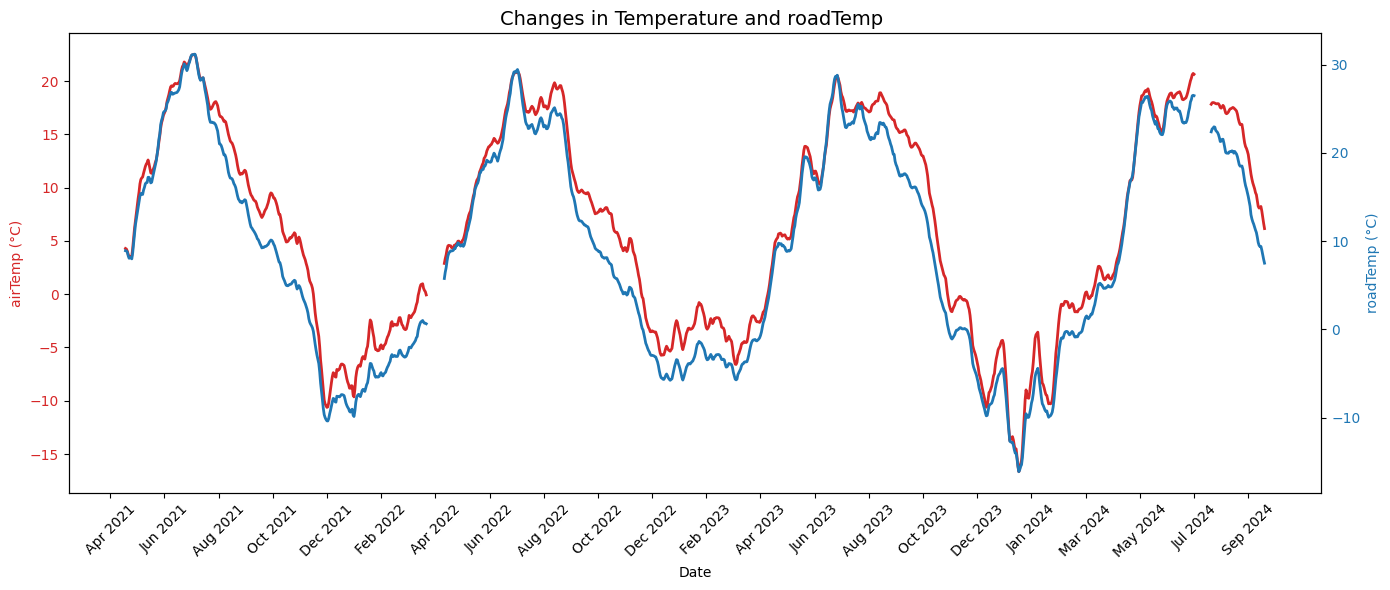

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates


data['ts'] = pd.to_datetime(data['ts'])


data_resampled = data.resample('D', on='ts').mean()  


data_resampled['airTemp_smooth'] = data_resampled['airTemp'].rolling(window=18).mean()
data_resampled['roadTemp_smooth'] = data_resampled['roadTemp'].rolling(window=18).mean()


fig, ax1 = plt.subplots(figsize=(14, 6))


ax1.plot(data_resampled.index, data_resampled['airTemp_smooth'], color='tab:red', label='airTemp (Smoothed)', linestyle='-', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('airTemp (°C)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')


ax2 = ax1.twinx()
ax2.plot(data_resampled.index, data_resampled['roadTemp_smooth'], color='tab:blue', label='roadTemp (Smoothed)', linestyle='-', linewidth=2)
ax2.set_ylabel('roadTemp (°C)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')


ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=15))  
ax1.set_xticks(data_resampled.index[::60])  


plt.xticks(rotation=45)


for label in ax1.get_xticklabels():
    label.set_rotation(45)


plt.title('Changes in Temperature and roadTemp ', fontsize=14)


plt.tight_layout()
plt.show()


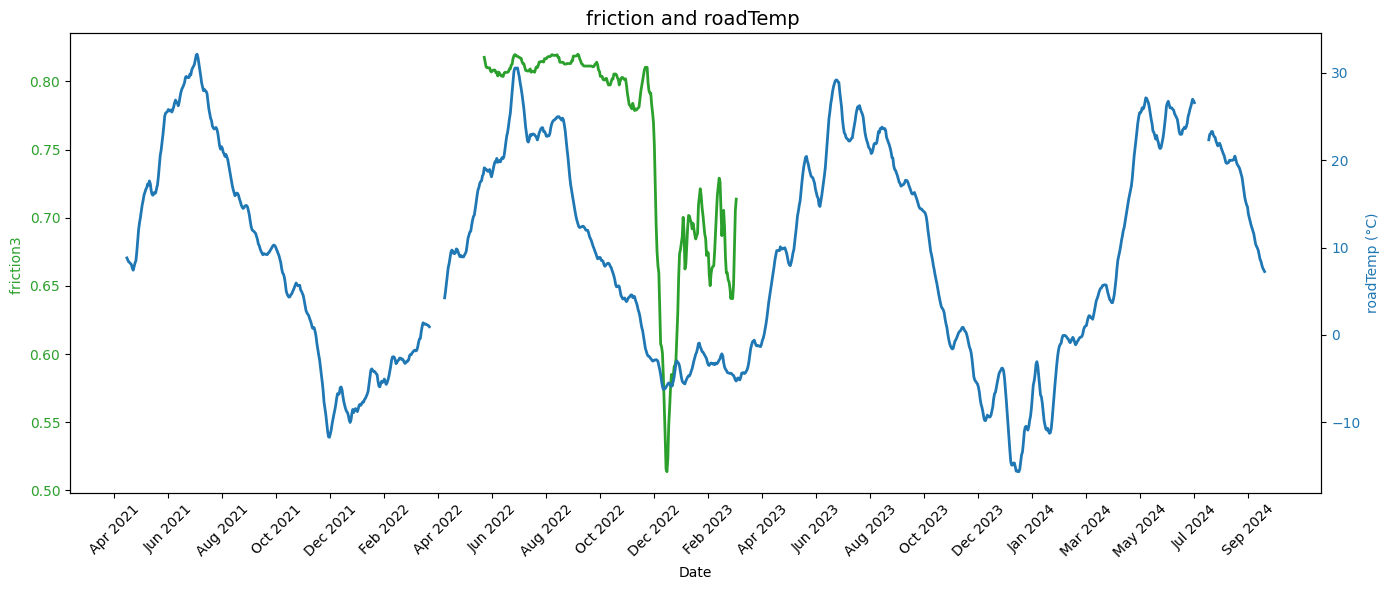

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates


data['ts'] = pd.to_datetime(data['ts'])


data_resampled = data.resample('D', on='ts').mean()  

data_resampled['friction3_smooth'] = data_resampled['friction3'].rolling(window=15).mean()
data_resampled['roadTemp_smooth'] = data_resampled['roadTemp'].rolling(window=15).mean()


fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(data_resampled.index, data_resampled['friction3_smooth'], color='tab:green', label='friction3 (Smoothed)', linestyle='-', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('friction3 ', color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax2 = ax1.twinx()
ax2.plot(data_resampled.index, data_resampled['roadTemp_smooth'], color='tab:blue', label='roadTemp (Smoothed)', linestyle='-', linewidth=2)
ax2.set_ylabel('roadTemp (°C)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=15)) 
ax1.set_xticks(data_resampled.index[::60])

plt.xticks(rotation=45)

for label in ax1.get_xticklabels():
    label.set_rotation(45)

plt.title('friction and roadTemp ', fontsize=14)

plt.tight_layout()
plt.show()


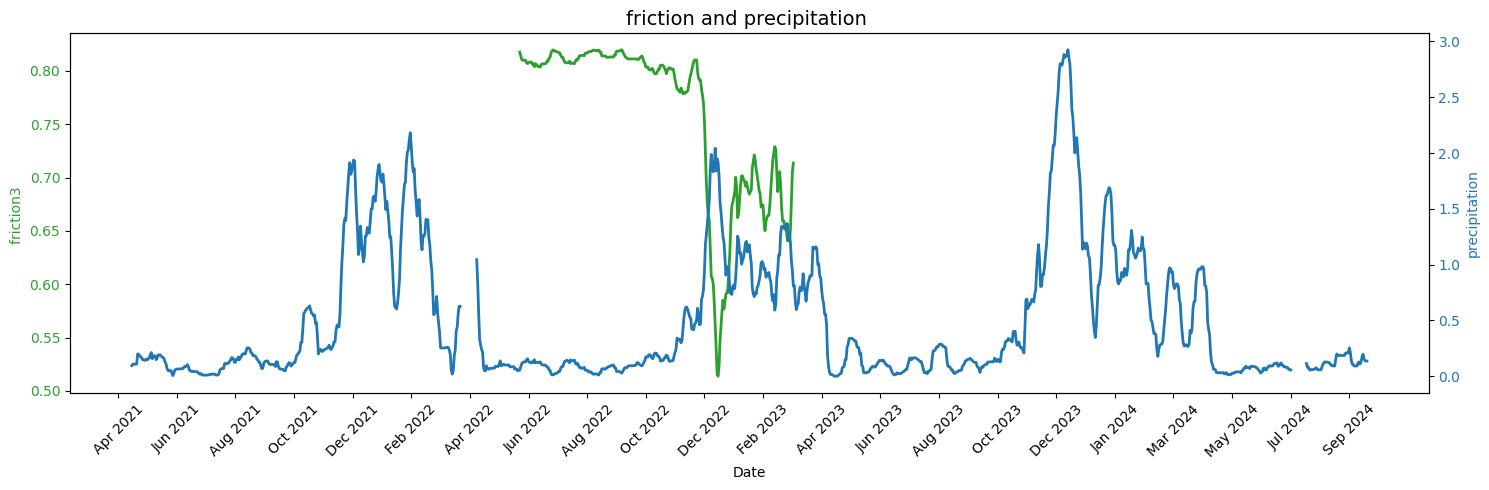

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

data['ts'] = pd.to_datetime(data['ts'])

data_resampled = data.resample('D', on='ts').mean()  

data_resampled['friction3_smooth'] = data_resampled['friction3'].rolling(window=15).mean()
data_resampled['precipitation_smooth'] = data_resampled['precipitation'].rolling(window=15).mean()


fig, ax1 = plt.subplots(figsize=(15, 5))


ax1.plot(data_resampled.index, data_resampled['friction3_smooth'], color='tab:green', label='friction3 (Smoothed)', linestyle='-', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('friction3 ', color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')


ax2 = ax1.twinx()
ax2.plot(data_resampled.index, data_resampled['precipitation_smooth'], color='tab:blue', label='precipitation (Smoothed)', linestyle='-', linewidth=2)
ax2.set_ylabel('precipitation', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=15))  
ax1.set_xticks(data_resampled.index[::60])  


plt.xticks(rotation=45)


for label in ax1.get_xticklabels():
    label.set_rotation(45)


plt.title('friction and precipitation ', fontsize=14)


plt.tight_layout()
plt.show()


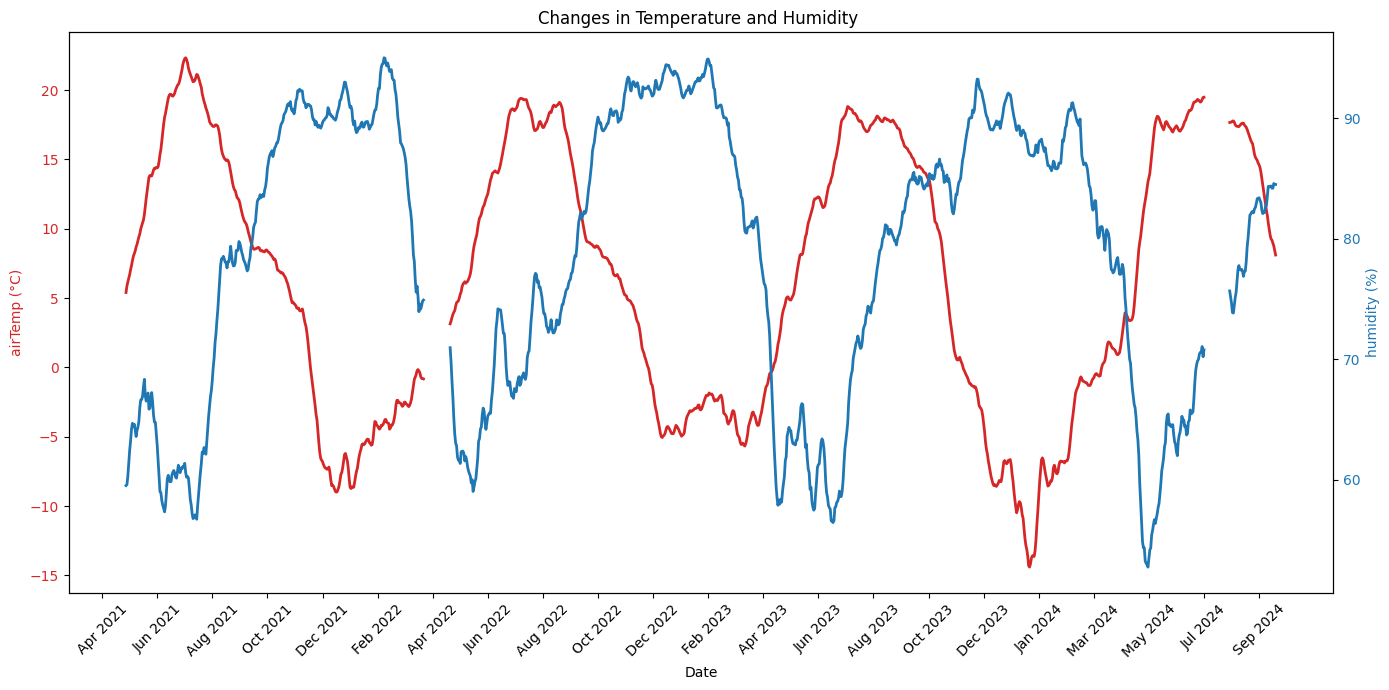

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


data['ts'] = pd.to_datetime(data['ts'])


data_resampled = data.resample('D', on='ts').mean()  


data_resampled['airTemp_smooth'] = data_resampled['airTemp'].rolling(window=27).mean()
data_resampled['humidity_smooth'] = data_resampled['humidity'].rolling(window=27).mean()


fig, ax1 = plt.subplots(figsize=(14, 7))


ax1.plot(data_resampled.index, data_resampled['airTemp_smooth'], color='tab:red', label='airTemp (Smoothed)', linestyle='-', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('airTemp (°C)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')


ax2 = ax1.twinx()
ax2.plot(data_resampled.index, data_resampled['humidity_smooth'], color='tab:blue', label='humidity (Smoothed)', linestyle='-', linewidth=2)
ax2.set_ylabel('humidity (%)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')


ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=15))  
ax1.set_xticks(data_resampled.index[::60])  


for label in ax1.get_xticklabels():
    label.set_rotation(45)



plt.title('Changes in Temperature and Humidity ')


plt.tight_layout()
plt.show()

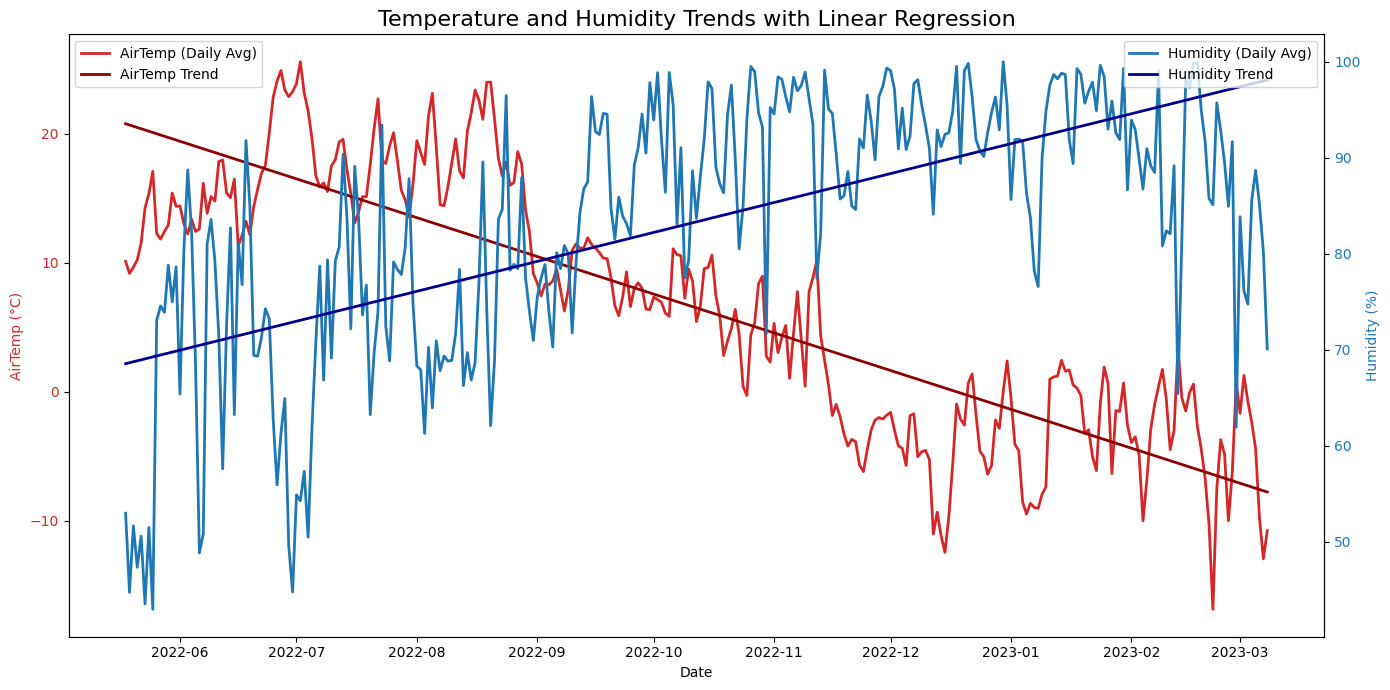

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


data['ts'] = pd.to_datetime(data['ts'])


data_resampled = data.resample('D', on='ts').mean()


data_resampled = data_resampled.dropna()

data_resampled['days'] = np.arange(len(data_resampled))

X_temp = data_resampled[['days']].values  #
y_temp = data_resampled['airTemp'].values  # 
model_temp = LinearRegression().fit(X_temp, y_temp)
data_resampled['airTemp_trend'] = model_temp.predict(X_temp)

y_humidity = data_resampled['humidity'].values  #
model_humidity = LinearRegression().fit(X_temp, y_humidity)
data_resampled['humidity_trend'] = model_humidity.predict(X_temp)


fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(data_resampled.index, data_resampled['airTemp'], color='tab:red', label='AirTemp (Daily Avg)', linestyle='-', linewidth=2)
ax1.plot(data_resampled.index, data_resampled['airTemp_trend'], color='darkred', label='AirTemp Trend', linestyle='-', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('AirTemp (°C)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# 
ax2 = ax1.twinx()
ax2.plot(data_resampled.index, data_resampled['humidity'], color='tab:blue', label='Humidity (Daily Avg)', linestyle='-', linewidth=2)
ax2.plot(data_resampled.index, data_resampled['humidity_trend'], color='darkblue', label='Humidity Trend', linestyle='-', linewidth=2)
ax2.set_ylabel('Humidity (%)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')


ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)
plt.title('Temperature and Humidity Trends with Linear Regression', fontsize=16)
plt.tight_layout()


plt.xticks(rotation=45)

#
plt.show()
